In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# 1. Cleaning & Preprocessing Data

- Làm sạch và tiền xử lý dữ liệu đối với `ProductRaw` dataset:

In [2]:
products = pd.read_csv('ProductRaw.csv')
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4404 non-null   int64  
 1   name         4404 non-null   object 
 2   description  4401 non-null   object 
 3   rating       4404 non-null   float64
 4   price        4404 non-null   int64  
 5   list_price   4404 non-null   int64  
 6   brand        4404 non-null   object 
 7   group        4404 non-null   object 
 8   url          4404 non-null   object 
 9   image        4404 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 344.2+ KB


- Kiểm tra và loại bỏ dữ liệu `null`, dữ liệu trùng lắp:

In [8]:
dup_val = len(products) - len(products.drop_duplicates())

if dup_val > 0:
    print('Number of duplicate values: {}'.format(dup_val))
else:
    print('No duplicate values.')

Number of duplicate values: 31


In [9]:
products.drop_duplicates(inplace = True)

print('Number of rows after drop duplication values: {}'.format(len(products)))

Number of rows after drop duplication values: 4373


In [10]:
products.isnull().sum()

item_id        0
name           0
description    3
rating         0
price          0
list_price     0
brand          0
group          0
url            0
image          0
dtype: int64

In [23]:
null_description = products.loc[products['description'].isnull()].index.tolist()
products.drop(null_description, inplace = True)

In [25]:
products = products.reset_index()
products.shape

(4370, 11)

In [26]:
products.head()

,index,item_id,name,description,rating,price,list_price,brand,group,url,image
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


- Làm sạch và tiền xử lý dữ liệu với `ReviewRaw` dataset:

In [12]:
reviews = pd.read_csv('ReviewRaw.csv')
reviews.head()

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaN,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaN,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364099 entries, 0 to 364098
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   364099 non-null  int64 
 1   product_id    364099 non-null  int64 
 2   name          363669 non-null  object
 3   full_name     329471 non-null  object
 4   created_time  117340 non-null  object
 5   rating        364099 non-null  int64 
 6   title         364070 non-null  object
 7   content       165794 non-null  object
dtypes: int64(3), object(5)
memory usage: 22.2+ MB


- Kiểm tra và loại bỏ dữ liệu trùng lắp:

In [14]:
dup_val = len(reviews) - len(reviews.drop_duplicates())

if dup_val > 0:
    print('Number of duplicate values: {}'.format(dup_val))
else:
    print('No duplicate values.')

Number of duplicate values: 2349


In [15]:
reviews.drop_duplicates(inplace = True)

print('Number of rows after drop duplication values: {}'.format(len(reviews)))

Number of rows after drop duplication values: 361750


- Xoá bỏ các cột chứa nhiều giá trị `null` và không cần thiết đối với việc áp dụng thuật toán sau này:

In [16]:
reviews.isnull().sum()

customer_id          0
product_id           0
name               428
full_name        34603
created_time    245525
rating               0
title               29
content         196064
dtype: int64

In [17]:
reviews.drop(['full_name', 'created_time'], axis = 1, inplace = True)
reviews.head()

,customer_id,product_id,name,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [19]:
reviews[~ reviews['product_id'].isin(products['item_id'])]

,customer_id,product_id,name,rating,title,content
156669,5687133,20845056,Lê Phương Tiến,4,Hài lòng,Hài lòng về máy sau 1 tuần dùng. Điểm trừ giao...
156670,8344149,20845056,Luu Tri Dung,5,Tuyệt vời,"Giao hàng đúng thời gian dự kiến, có 2 ngày. M..."
156671,10671105,20845056,Nguyễn Thu Hằng,5,Cực kì hài lòng,"Sản phẩm được đóng gói cẩn thận, pin dùng được..."
156683,373425,20845056,Quân Nguyễn,2,Nên mua ở ngoài,Mình mua kindle Paperwhite 2019 được tầm cỡ 2 ...
156691,1279789,20845056,Quân Trần,1,"Ship chậm, máy ko active được",Tôi nhận đc sản phẩm ko active được. Khi liên ...
...,...,...,...,...,...,...
192248,10449689,12706787,Hai An,4,Hài lòng,có dùng cho dòng điện thoại khác ngoài iphone ...
192249,6079274,12706787,Nguyễn trung hiếu,4,"Hàng nghe mượt, tốt",Hàng chuẩn! Nhưng mình đang phân vân ko biết 1...
192250,7474878,12706787,Mon Pham,5,Quá phê !!!!,Mong lần sau đừng giao hàng chậm nữa tháng như...
192251,13144258,12706787,Đỗ Đức Việt,5,Thắc mắc,Hàng nhập khẩu với hàng VNA khác nhau gì vậy T...


- Lọc các reviews của các `product_id` có trong cột `item_id` của file `ProductRaw`:

In [20]:
reviews = reviews[reviews['product_id'].isin(products['item_id'])]

In [21]:
reviews.shape

(361090, 6)

- Lưu các file sau khi đã làm sạch và tiền xử lý:

In [30]:
products.to_csv('Products.csv', index = False)
reviews.to_csv('Reviews.csv')

In [69]:
products.head(2)

,index,item_id,name,description,rating,price,list_price,brand,group,url,image
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [70]:
reviews.loc[reviews['product_id'] == 48102821]

,customer_id,product_id,name,rating,title,content
201693,159465,48102821,Quách Tường Vy,4,Hài lòng,"Ưu điểm: rẻ, đẹp, màu cũng đẹp, đeo vừa tai, n..."
201694,16122994,48102821,Huy Hong L,5,Cực kì hài lòng,Hàng chất lượng nên mua nhaaa Mình đặt màu xan...
201695,18720987,48102821,Thắng Đỗ,2,Không hài lòng,Tôi đặt sp sáng nay và trưa có liền.Nhưng vấn ...
201696,19631063,48102821,apple user,4,Hài lòng,"Sản phẩm OK , đẹp Nên kèm thêm hướng dẫn bằng ..."
201697,1269974,48102821,Truc Pham,3,TẠM ĐƯỢC,"Mẫu mã như hình chụp. Bluetooth bắt hơi yếu, h..."
...,...,...,...,...,...,...
203186,12479631,48102821,Phan Tuấn Duy,5,Cực kì hài lòng,NaN
203188,19400913,48102821,Giao Linh,4,Hài lòng,NaN
203189,128735,48102821,Ái Bình Đường,1,Rất không hài lòng,"Tai nghe chưa được 1 phút thì báo tắt, sạc pin..."
203190,14371323,48102821,Thẩm TAnh,1,Rất không hài lòng,Sản phẩm chỉ nghe đc 1 bên tai


# 2. EDA

- Sau khi làm sạch và tiền xử lý, ta sẽ phân tích một số khía cạnh của cả 2 dataset để có cái nhìn tổng quan hơn:

In [33]:
product = pd.read_csv('Products.csv')
product.head(3)

,index,item_id,name,description,rating,price,list_price,brand,group,url,image
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...


- Top 10 thương hiệu có nhiều đơn đặt hàng nhất:

In [130]:
product['rating'].value_counts()

0.0    788
5.0    593
4.8    442
4.7    427
4.6    361
4.5    326
4.3    233
4.9    220
4.0    204
4.4    191
4.2    125
4.1     77
3.8     61
3.7     53
3.0     52
3.9     49
3.5     40
1.0     24
3.6     23
3.3     17
3.4     15
3.2      9
2.0      7
2.5      7
2.7      6
3.1      5
2.8      4
2.3      4
1.3      2
2.2      2
2.6      1
2.1      1
1.8      1
Name: rating, dtype: int64

In [42]:
a = product['brand'].value_counts().sort_values(ascending = False)[: 10]

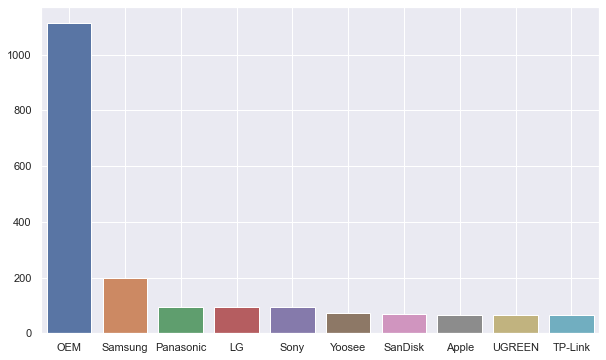

In [53]:
sb.set_theme()
plt.figure(figsize = (10, 6))
sb.barplot(a.index, a.values)
plt.grid(True);

- Brand `OEM` có số lượng đơn đặt hàng vượt trội hơn hẳn so với cái brand khác trong bảng xếp hạng.

In [59]:
product.groupby('brand')['rating'].mean().sort_values(ascending = False)[: 10]

brand
\tOEM          5.0
RONALD JACK    5.0
Midea          5.0
California     5.0
COOL COLD      5.0
CHOETECH       5.0
Nexus          5.0
QGeeM          5.0
Biostar        5.0
Alaska         5.0
Name: rating, dtype: float64

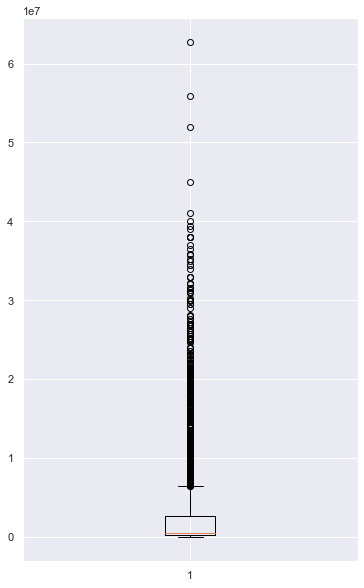

In [103]:
plt.figure(figsize=(6, 10))
plt.boxplot(products['price']);

- Range giá bán của các sản phẩm trải khá rộng.

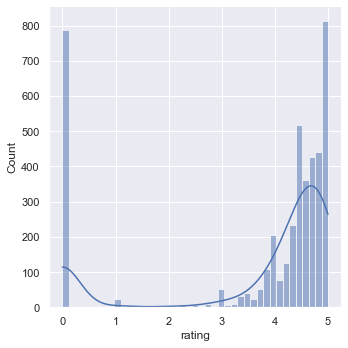

In [99]:
sb.displot(data = products, x='rating', kde = True);

- Các đánh giá sản phẩm chủ yếu từ mức trung tính (3) đến mức tích cực(4 - 5) chiếm số lượng khá lớn. Có một số lượng lớn các đánh giá ở mức 0 điểm, nhìn vào biểu đồ và các trực quan hoá phía trên, điều này xảy ra có thể do thông tin bị thiếu hoặc sai sót ở khâu thu thập dữ liệu.

In [80]:
sum_price_per_brand = products.groupby('brand')['price'].sum()
sum_price_per_brand

brand
\tOEM               26000
 BUBM              259000
 Casper          24788000
 CoolerMaster    17978000
 EZVIZ           26555000
                   ...   
hohem             1290000
ipass              980000
new vision         779211
vivan              607000
xMOWI              169000
Name: price, Length: 521, dtype: int64

In [95]:
b = sum_price_per_brand.sort_values(ascending = False)[: 10]

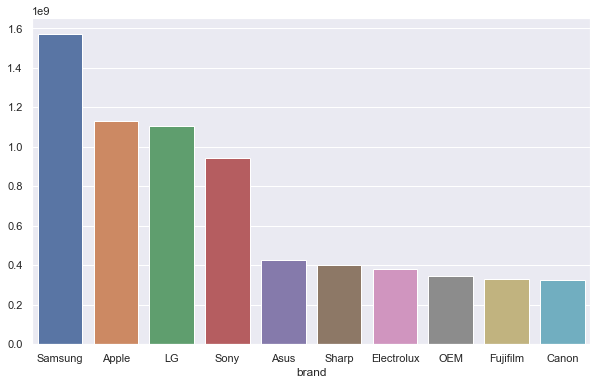

In [88]:
plt.figure(figsize=(10, 6))
sb.barplot(x = b.index, y = b.values);

- Biểu đồ thể hiện tổng doanh thu của 10 brand có doanh thu cao nhất, brand `OEM` mặc dù có lượng đơn hàng vượt trội tuy nhiên tổng doanh thu xếp sau khá nhiều brand có lượng đơn hàng thấp.

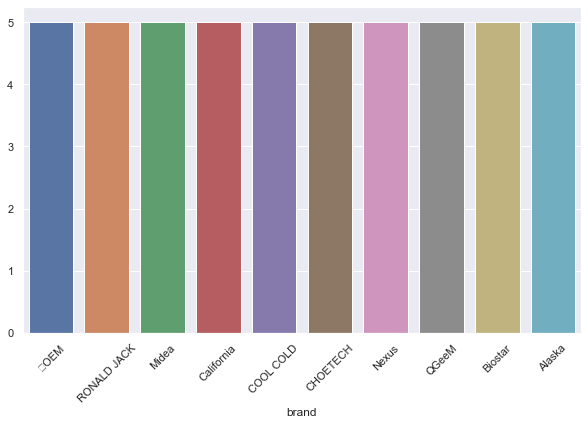

In [127]:
c = products.groupby('brand')['rating'].mean().sort_values(ascending = False)[: 10]
plt.figure(figsize=(10, 6))
sb.barplot(c.index, c.values)
plt.xticks(rotation = 45);

- Trung bình `rating` của top 10 thương hiệu có `rating` cao nhất

In [100]:
reviews.head()

,customer_id,product_id,name,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [128]:
reviews['rating'].value_counts()

5    256211
4     60565
3     20600
1     16616
2      7098
Name: rating, dtype: int64

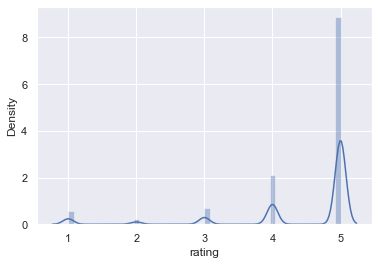

In [112]:
sb.distplot(reviews['rating']);

- Ở `Reviews` dataset, điểm rating là số nguyên, điểm đánh giá là số tròn, còn đối với `Products` dataset, điểm rating là số thập phân, range điểm trải dài trên tập số thực từ 0.0 - 5.0.

- Top 10 sản phẩm được đánh giá nhiều nhất:

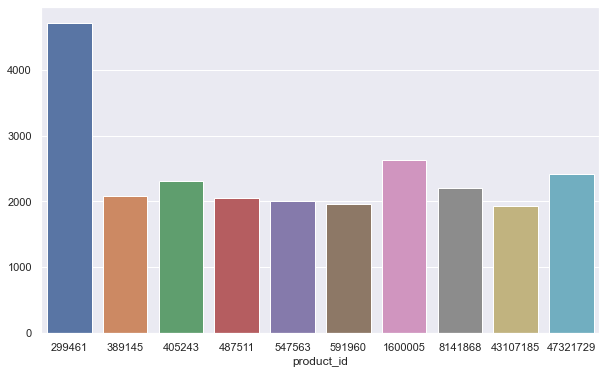

In [115]:
d = reviews.groupby('product_id')['rating'].count().sort_values(ascending = False)[: 10]
plt.figure(figsize=(10, 6))
sb.barplot(d.index, d.values);

- Top 10 title hay được sử dụng trong việc nhận xét sản phẩm:

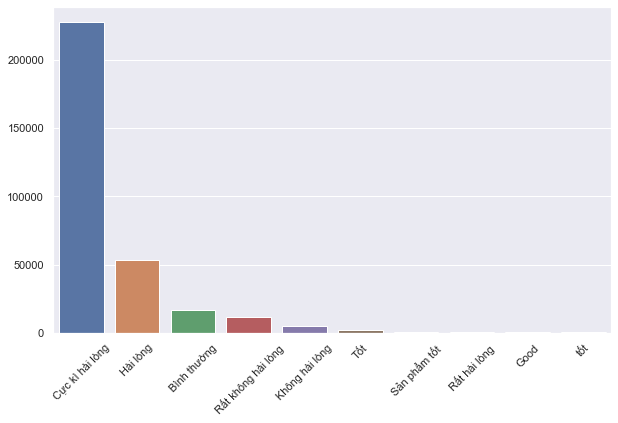

In [126]:
e = reviews['title'].value_counts().sort_values(ascending = False)[: 10]
plt.figure(figsize=(10, 6))
sb.barplot(e.index, e.values)
plt.xticks(rotation = 45);

- Từ biểu đồ có thể thấy, các đánh giá và nhận xét đa phần là tích cực, bên cạnh đó vẫn có một lượng nhỏ đánh giá không hài lòng về sản phẩm.